In [1]:
%matplotlib inline
# NB: per eseguire questo notebook come file Python, commentare l'istruzione "%matplotlib inline" qui sopra e scegliere il menù "File -> Download as -> Python (.py)"
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100

In [3]:
c1 = np.random.randn(N)
c2 = c1 * 0.9
A1 = np.squeeze(np.array([[c1],[c2]])).T
print(A1.shape)

(100, 2)


In [4]:
c1 = np.random.randn(N)
c2 = c1 * 0.9 + 0.3*np.random.randn(N)
A2 = np.squeeze(np.array([[c1],[c2]])).T

In [5]:
# now, let us change the unity measurement for x2 in data matrix A2, 
# e.g. considering as it would be a length, from "m" to "cm":
c2u = (c1 * 0.9 + 0.3*np.random.randn(N))*100.0
A2u = np.squeeze(np.array([[c1],[c2u]])).T

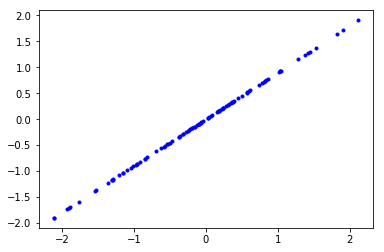

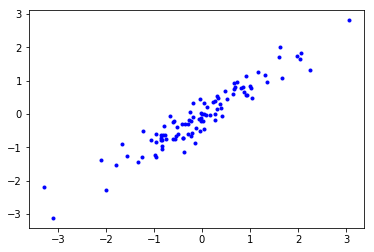

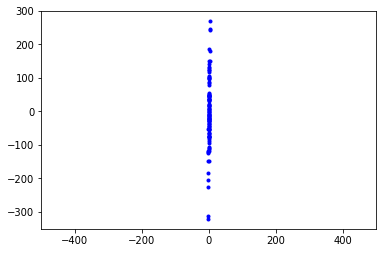

In [6]:
plt.figure(1), plt.plot(A1[:,0],A1[:,1],'b.'); plt.show()
plt.figure(2), plt.plot(A2[:,0],A2[:,1],'b.'); plt.show()
#plt.figure(3), plt.plot(A2u[:,0],A2u[:,1],'b.'); plt.show()
plt.figure(4), plt.plot(A2u[:,0],A2u[:,1],'b.'); plt.axis('equal'); plt.show()

In [7]:
print("PCA with covariance matrices:")
# compute the principal components of A2 data matrix:
C = np.cov(A2,rowvar=0)  # covariance matrix
D,V = np.linalg.eig(C)
I = np.argsort(D)
I = I[-1::-1] # reverse indices: I[0] indexes the maximum eigenvalue
#print I
D = D[I]
#print "D = ",D
V = V[:,I]
# verify that eigenvectors have unit-norm:
if False:
    print("2-norms of eigenvectors:")
    print(np.linalg.norm(V[:,0]))
    print(np.linalg.norm(V[:,1]))
#endif
print("first principal component of A2 is: ",V[0,0],"*x1 + ",V[1,0],"*x2")
# now, compute the principal components of A2u, with changed x2 unity measurement:
Cu = np.cov(A2u,rowvar=0)  # covariance matrix
D,V = np.linalg.eig(Cu)
I = np.argsort(D) # sort in asending order
I = I[-1::-1] # reverse indices: I[0] indexes the maximum eigenvalue
#print I
D = D[I]
#print "D = ",D
V = V[:,I]
# verify that eigenvectors have unit-norm:
if False:
    print("2-norms of eigenvectors:")
    print(np.linalg.norm(V[:,0]))
    print(np.linalg.norm(V[:,1]))
#endif
print("first principal component of A2u is: ",V[0,0],"*x1 + ",V[1,0],"*x2")
print("")
print("PCA with correlation matrices:")
# compute the principal components of A2 data matrix:
R = np.corrcoef(A2,rowvar=0)  # Pearson correlation matrix
D,V = np.linalg.eig(R)
I = np.argsort(D)
I = I[-1::-1] # reverse indices: I[0] indexes the maximum eigenvalue
#print I
D = D[I]
#print "D = ",D
V = V[:,I]
# verify that eigenvectors have unit-norm:
if False:
    print("2-norms of eigenvectors:")
    print(np.linalg.norm(V[:,0]))
    print(np.linalg.norm(V[:,1]))
#endif
print("first principal component of A2 is: ",V[0,0],"*x1 + ",V[1,0],"*x2")
# now, compute the principal components of A2u, with changed x2 unity measurement:
Ru = np.corrcoef(A2u,rowvar=0)  # Pearson correlation matrix
D,V = np.linalg.eig(Ru)
I = np.argsort(D) # sort in asending order
I = I[-1::-1] # reverse indices: I[0] indexes the maximum eigenvalue
#print I
D = D[I]
#print "D = ",D
V = V[:,I]
# verify that eigenvectors have unit-norm:
if False:
    print("2-norms of eigenvectors:")
    print(np.linalg.norm(V[:,0]))
    print(np.linalg.norm(V[:,1]))
#endif
print("first principal component of A2u is: ",V[0,0],"*x1 + ",V[1,0],"*x2")

PCA with covariance matrices:
first principal component of A2 is:  0.7424308718156718 *x1 +  0.669922682535098 *x2
first principal component of A2u is:  -0.009545461842695621 *x1 +  -0.9999544410412954 *x2

PCA with correlation matrices:
first principal component of A2 is:  0.7071067811865475 *x1 +  0.7071067811865475 *x2
first principal component of A2u is:  0.7071067811865475 *x1 +  0.7071067811865475 *x2


In [9]:
print(R)
print(Ru)

[[1.         0.94799267]
 [0.94799267 1.        ]]
[[1.         0.94368338]
 [0.94368338 1.        ]]


In [11]:
print(C)
print(Cu)

[[1.09803422 0.94428515]
 [0.94428515 0.90360885]]
[[1.09803422e+00 1.02436945e+02]
 [1.02436945e+02 1.07311125e+04]]


In [12]:
help(np.cov)

Help on function cov in module numpy:

cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None)
    Estimate a covariance matrix, given data and weights.
    
    Covariance indicates the level to which two variables vary together.
    If we examine N-dimensional samples, :math:`X = [x_1, x_2, ... x_N]^T`,
    then the covariance matrix element :math:`C_{ij}` is the covariance of
    :math:`x_i` and :math:`x_j`. The element :math:`C_{ii}` is the variance
    of :math:`x_i`.
    
    See the notes for an outline of the algorithm.
    
    Parameters
    ----------
    m : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `m` represents a variable, and each column a single
        observation of all those variables. Also see `rowvar` below.
    y : array_like, optional
        An additional set of variables and observations. `y` has the same form
        as that of `m`.
    rowvar : bool, optional
        If 

In [13]:
help(np.corrcoef)

Help on function corrcoef in module numpy:

corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>)
    Return Pearson product-moment correlation coefficients.
    
    Please refer to the documentation for `cov` for more detail.  The
    relationship between the correlation coefficient matrix, `R`, and the
    covariance matrix, `C`, is
    
    .. math:: R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }
    
    The values of `R` are between -1 and 1, inclusive.
    
    Parameters
    ----------
    x : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `x` represents a variable, and each column a single
        observation of all those variables. Also see `rowvar` below.
    y : array_like, optional
        An additional set of variables and observations. `y` has the same
        shape as `x`.
    rowvar : bool, optional
        If `rowvar` is True (default), then each row represents a
        variable, with obse